Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Jiawen Miao"
COLLABORATORS = ""

---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Traffic.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Display dataset info (column names, data types, and non-null counts)
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

First 5 rows of the dataset:
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 

In [4]:
# Check for duplicate rows
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if any exist
data = data.drop_duplicates()
print(f"Dataset shape after removing duplicates: {data.shape}")

# Check for outliers in numerical columns
numerical_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with outliers
outliers = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)
print(f"Number of rows with outliers: {outliers.sum()}")

# Filter out rows with outliers
data = data[~outliers]
print(f"Dataset shape after removing outliers: {data.shape}")


Number of duplicate rows: 0
Dataset shape after removing duplicates: (2899, 10)
Number of rows with outliers: 0
Dataset shape after removing outliers: (2899, 10)


In [6]:
print("Available columns in the dataset:")
print(data.columns)


Available columns in the dataset:
Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Hour', 'Vehicle_Hourly_Interaction', 'IsWeekend',
       'TrafficSituationEncoded'],
      dtype='object')


In [7]:
# Create an interaction feature: Vehicle count and hour
data['Vehicle_Hourly_Interaction'] = data['CarCount'] * data['Hour']

# Add a feature to identify weekends (already encoded as 'IsWeekend')
# This step is redundant if 'IsWeekend' is already correct
print(data.head())


   Date  CarCount  BikeCount  BusCount  TruckCount  Total  Hour  \
0    10        31          0         4           4     39     0   
1    10        49          0         3           3     55     0   
2    10        46          0         3           6     55     0   
3    10        51          0         2           5     58     0   
4    10        57          6        15          16     94     1   

   Vehicle_Hourly_Interaction  IsWeekend  TrafficSituationEncoded  
0                           0          0                        2  
1                           0          0                        2  
2                           0          0                        2  
3                           0          0                        2  
4                          57          0                        3  


In [8]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Hour', 'IsWeekend', 'TrafficSituationEncoded']]
y = data['Total']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2319, 7)
X_test shape: (580, 7)
y_train shape: (2319,)
y_test shape: (580,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Train the model

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")


Linear Regression - MAE: 0.00, MSE: 0.00, R2: 1.00
Random Forest - MAE: 2.53, MSE: 13.26, R2: 1.00


In [10]:
# Verify if the target is derived from features
data['CalculatedTotal'] = data['CarCount'] + data['BikeCount'] + data['BusCount'] + data['TruckCount']
print("Number of mismatches between 'Total' and 'CalculatedTotal':", 
      (data['Total'] != data['CalculatedTotal']).sum())


Number of mismatches between 'Total' and 'CalculatedTotal': 0


In [12]:
# Update target to 'TrafficSituationEncoded' for classification
X = data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Hour', 'IsWeekend']]
y = data['TrafficSituationEncoded']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       118
           1       0.94      0.84      0.89        61
           2       1.00      0.98      0.99        61
           3       0.96      0.99      0.97       340

    accuracy                           0.96       580
   macro avg       0.97      0.94      0.95       580
weighted avg       0.96      0.96      0.96       580



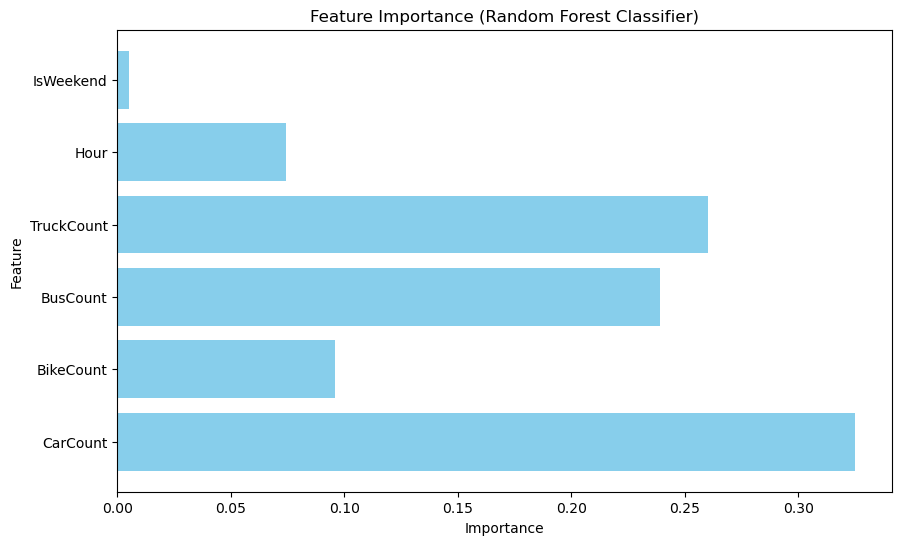

In [13]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = clf.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title("Feature Importance (Random Forest Classifier)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [14]:
# Train a balanced Random Forest Classifier
clf_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_balanced.fit(X_train, y_train)

# Evaluate the balanced model
y_pred_balanced = clf_balanced.predict(X_test)
print(f"Balanced Model Accuracy: {accuracy_score(y_test, y_pred_balanced):.2f}")
print("Balanced Classification Report:")
print(classification_report(y_test, y_pred_balanced))


Balanced Model Accuracy: 0.96
Balanced Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       118
           1       0.91      0.84      0.87        61
           2       1.00      0.98      0.99        61
           3       0.97      0.98      0.97       340

    accuracy                           0.96       580
   macro avg       0.96      0.94      0.95       580
weighted avg       0.96      0.96      0.96       580



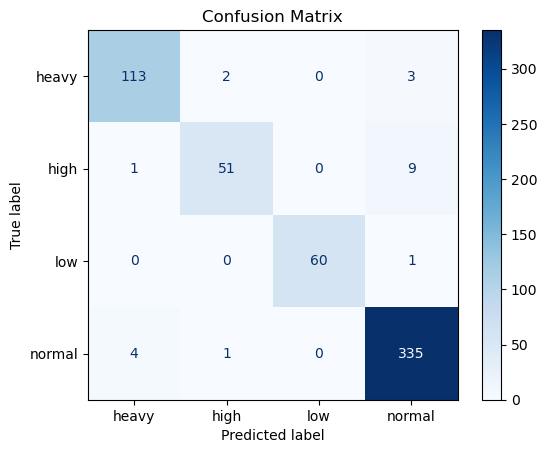

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42)
}

# Store results
results = {}

# Loop through models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Evaluate model
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f"{model_name} Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Compare model accuracies
print("\nModel Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}")


Training Logistic Regression...


/usr/lib/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       118
           1       0.78      0.69      0.73        61
           2       0.81      0.69      0.74        61
           3       0.90      0.93      0.92       340

    accuracy                           0.89       580
   macro avg       0.86      0.82      0.84       580
weighted avg       0.89      0.89      0.89       580

--------------------------------------------------
Training Random Forest...
Random Forest Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       118
           1       0.94      0.84      0.89        61
           2       1.00      0.98      0.99        61
           3       0.96      0.99      0.97       340

    accuracy                           0.96       580
   macro avg       0.97      0.94      0.95       58